First step, running command: 

python -c "from transformers import pipeline; print(pipeline('sentiment-analysis')('hugging face is the best'))"

imports the pipeline module from the transformers package from HuggingFace. Its a high level API which locates the pretrained model, its tokenizer, make sure input text gets tokenized properly, running LM inference and format output to be human readable. So its sort of a wrapper to all these more complicated steps. 

In this case it defaults to download a pre-trained model (distilbert) that is fine-tuned for sentiment-analysis. In the next exercise we use the task string "text-generation" with the gpt2 model.

The ultimate output is the classifier of the sentence "hugging face is the best" which gets labeled as "positive" sentiment, where the score is how confident the model is in the sentence sentiment. 

In [2]:
from transformers import pipeline, set_seed

set_seed(42)

generator = pipeline("text-generation", model="gpt2")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

c:\Codeprojects\AI4h\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mathi\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better perform

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [16]:
generator("Hello, i'm a language model, ", max_length=50, num_return_sequences=3, repetition_penalty=2.0)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "Hello, i'm a language model, ive never done it before and there's no way to fix my problem. the only thing I know is you guys can't use this script on your own machine if u are using an existing python interpreter\n"},
 {'generated_text': "Hello, i'm a language model, ive been doing this for some time. I have really good ideas and things to tell you about what my languages are all the way through its development so far... but those that say they don't understand english can just be wrong!\nTricks To Be A Language Model In 2014 (I also wrote two posts on learning/learning an object-oriented programming paradigm) - http://www1iideas2msupport.com/, https:/ /."},
 {'generated_text': 'Hello, i\'m a language model, ive seen it in many others. (And don\'t worry about you not understanding the concept that I am talking). But this is an important point to consider:\n2) The \'first\' type of C# syntax for implementing.NET\'s class parameters and methods cannot be used as ide

We see that the prompts start similarly, all begin with "ive" but after that they diverge due to "Stochastic decoding", since each token draw is random from $p(x_{t+1}|x_{\geq t})$

In the first sentence we see some repition and downright rambling. This is due to GPT2 being a small model. With short prompts and unconstrained sampling it can fall into degenerate repetition, i.e. should use a stopping rule or repition penalty. 

In [17]:
generator = pipeline("text-generation", model="gpt2")
tok = generator.tokenizer
out = generator(
    "Hello, I'm a language model,",
    max_length=60,
    do_sample=True,
    temperature=0.7,
    top_p=0.9,
    top_k=50,
    repetition_penalty=1.1,
    eos_token_id=tok.eos_token_id,
    num_return_sequences=3,
)

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


In [18]:
out

[{'generated_text': "Hello, I'm a language model, not an expression.\nI'd like to know what you think about my work here and on the web:"},
 {'generated_text': 'Hello, I\'m a language model, and it\'s very easy to think about. It allows us to understand what languages are written in them at once: the idea that they\'re real is all there; but we don\'t know how things look when you go down memory lane or write code where those kinds of words aren�t available for other people to see."\n\n\n'},
 {'generated_text': "Hello, I'm a language model, and the most common thing that comes to mind is type inference.\nI think of it as what happens when you have something like this: if we look at some code for an instance (say) function in Scala or Java then there's probably somewhere around 50 lines out where our program could be written without any kind OFFLINE-like errors happening! And they're all pretty trivial stuff so let's try them together with TypeScript! This would just make things more ve

In [6]:
print(generator.tokenizer, generator.model, sep="\n" + "-" * 45 + "\n")

GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}
)
---------------------------------------------
GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2)

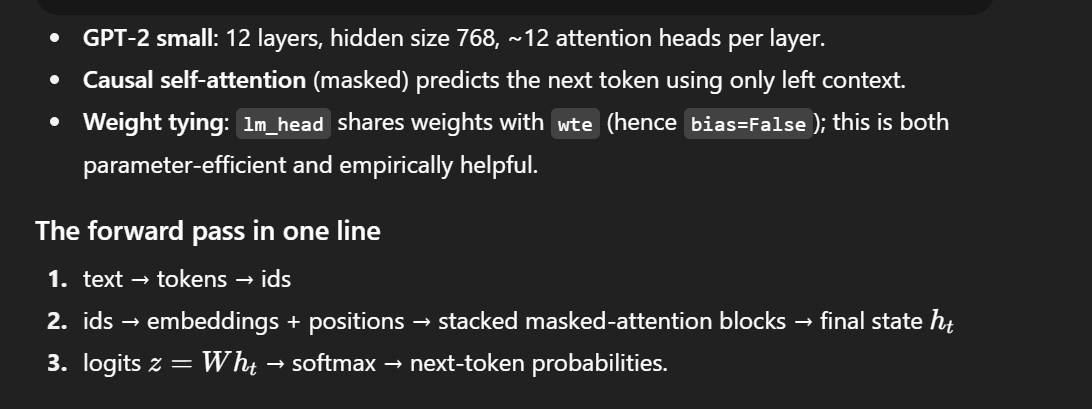

In [ ]:
# See top 10 candidate tokens for the next position of the sentence
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

tok = AutoTokenizer.from_pretrained("gpt2")
mdl = AutoModelForCausalLM.from_pretrained("gpt2")
ids = tok("Hello, I'm a language model,", return_tensors="pt").input_ids
with torch.no_grad():
    logits = mdl(ids).logits  # [batch, seq, vocab]
next_logits = logits[0, -1]    # last position
probs = next_logits.softmax(dim=-1)
topk = torch.topk(probs, k=10)
top_tokens = [tok.decode([i]) for i in topk.indices.tolist()]
list(zip(top_tokens, topk.values.tolist()))[:10]

[(' not', 0.16434252262115479),
 (' and', 0.15157510340213776),
 (' I', 0.10749268531799316),
 (' so', 0.0742243304848671),
 (' but', 0.07248888164758682),
 (' a', 0.05436461418867111),
 (' you', 0.02051439881324768),
 (' which', 0.017705172300338745),
 (' it', 0.01107183936983347),
 (' my', 0.007239130325615406)]

In [7]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

In [8]:
print(model, model.config, sep="\n" + "-" * 45 + "\n")

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)
---------------------------------------------
GPT2Con

In [12]:
text = "Hello, I'm a language model,"
encoded_input = tokenizer(text, return_tensors="pt")
id_to_token = {i: t for t, i in tokenizer.get_vocab().items()}

In [14]:
output = model(**encoded_input, labels=encoded_input["input_ids"])
print(output.loss, output.logits, output.logits.shape, sep="\n")

tensor(4.0033, grad_fn=<NllLossBackward0>)
tensor([[[ -35.2363,  -35.3266,  -38.9754,  ...,  -44.4645,  -43.9975,
           -36.4580],
         [-112.6171, -114.5832, -116.5725,  ..., -119.0128, -118.8059,
          -111.6917],
         [-151.7889, -152.3330, -156.7318,  ..., -162.0787, -155.4329,
          -154.7270],
         ...,
         [-101.2855, -102.6806, -106.1684,  ..., -111.2952, -112.3795,
          -104.9979],
         [-101.5027, -103.5055, -108.4597,  ..., -116.2316, -114.9146,
          -105.6841],
         [-103.7559, -105.5973, -106.9940,  ..., -110.1292, -110.7860,
          -104.5280]]], grad_fn=<UnsafeViewBackward0>)
torch.Size([1, 8, 50257])


In [20]:
import numpy as np
import torch.nn as nn

loss_fn = nn.CrossEntropyLoss()

logits = output.logits.squeeze()
yhat = logits[:-1]
y = encoded_input["input_ids"].squeeze()[1:]
loss = loss_fn(yhat, y).item()

assert np.allclose(loss, output.loss.item())

In [22]:
from typing import Callable

def greedy_decoding(logit: torch.tensor) -> int:
    """Greedy decoding: pick the token with the highest probability."""
    return logit.argmax().item()

def generate_text(
    model: GPT2LMHeadModel,
    tokens: torch.Tensor,
    max_length: int,
    sample_fn: Callable[[torch.Tensor], int] = greedy_decoding,
) -> torch.Tensor:
    """Generate text using the given model and sampling function."""
    generated = tokens
    for _ in range(max_length - tokens.shape[1]):
        with torch.no_grad():
            logits = model(generated).logits
        next_token = sample_fn(logits[0, -1])
        generated = torch.cat((generated, torch.tensor([[next_token]])), dim=1)
        if next_token == tokenizer.eos_token_id:
            break
    return generated

In [ ]:
tokens = generate_text(
    model,
    tokenizer("Hello world,", return_tensors="pt")["input_ids"],
    max_length=26,
    sample_fn=greedy_decoding,
)
print(tokenizer.decode(tokens[0]))
# cool

Hello world, I'm not sure what to say.

"I'm sorry, but I'm not sure what to say


In [24]:
from torch.distributions.categorical import Categorical

def topk_sampling(logit: torch.Tensor, k: int = 10) -> int:
    """Top-k sampling: pick the next token from the top k candidates."""
    topk = torch.topk(logit, k=k)
    topk_indices = topk.indices
    topk_probs = topk.values.softmax(dim=-1)
    distrib = Categorical(topk_probs)
    sampled_index = distrib.sample().item()
    return topk_indices[sampled_index].item()

In [25]:
from functools import partial

torch.manual_seed(2025)
tokens = generate_text(
    model,
    tokenizer("Hello world,", return_tensors="pt")["input_ids"],
    max_length=65,
    sample_fn=partial(topk_sampling, k=10),
)
print(tokenizer.decode(tokens[0]))

Hello world, this is not the end of the world. We've got to have something to do with it, because if we don't then things can change. The next big thing is the future.

It is also the future that is the future of the world. It is a world in which people can live
